In [1]:
# High Energy Detector Lab
# Need to take data from detectors, import data, remove background, plot counts vs channels
# Fit gaussians to the peaks, find channel for each peak, plot peak energies (from knowing the spectra) vs their peaks
# Associate each channel with an energy and then plot that bitch

# Watch out for pair production and compton scattering plateau

In [2]:
#%%capture
#!pip install ipympl
#from google.colab import output
#get_ipython().kernel.do_shutdown(restart=True)

In [3]:
#%matplotlib ipympl

#NAITI DETECTOR

##Cobalt

In [4]:
# Getting Data

# First, Creating a Dictionary for the header
data_head = {}

# Creating a location for the data
data = []

# Open the file
with open('NaI_Co_direct.Spe') as file:

    # Ok loops are how I understand things so I'm making a index to loop through the lines
    lines = file.readlines()
    ind = list(range(0,len(lines),1))

    # Read each line in the file
    for val in ind:
        line = lines[val].strip()

        # Get header
        if line.startswith('$'): #These are the titles of our header

            # Read the line and remove # (This become Dictionary Header)
              line = line.replace("$", "").strip()

            # Read next line to get the Dictionary Value (cuts off stupid 'Comments' sadly)
              value = lines[val+1].strip()

            # Add Header to the dictionary
              data_head.update({line: value})

        # Get data
        else:
            # Just looking for data here, don't care about other stuff
            try:
                counts = list(map(float, line.split(',')))
                data.append(counts)

            except ValueError:
                # This is when we read a line that doesn't have # but is a str of letters
                # And we DONT WANT IT
                pass


In [5]:
len(data)
# Crap there's shit at the end of the data that's messing with this shit

1029

In [6]:
data[1027]

[3.0]

In [7]:
data_head
# Doesn't catch all the shit at the end cause it's formatted different FUCK

{'SPEC_ID:': 'No sample description was entered.',
 'SPEC_REM:': 'DET# 1',
 'DATE_MEA:': '10/28/2025 12:58:16',
 'MEAS_TIM:': '600 600',
 'DATA:': '0 1023',
 'ROI:': '0',
 'PRESETS:': 'None',
 'ENER_FIT:': '-10.130505 2.230151',
 'MCA_CAL:': '3',
 'SHAPE_CAL:': '3'}

In [8]:
# Going to concatenate my data and just not going to care about the header info
# at the end (MCA_CAL and SHAPE_CAL)

# Find where to cut-off data
z , cutoff = data_head['DATA:'].split(' ')
cutoff = int(cutoff)

# Cut that data doooowwwn
data = data[:1023+1]

In [9]:
# Going to make this a function cause I'm going to have to use it alot
def Spe_parser(filename):
  # Getting Data

  # First, Creating a Dictionary for the header
  data_head = {}

  # Creating a location for the data
  data = []

  # Open the file
  with open(filename) as file:

    # Ok loops are how I understand things so I'm making a index to loop through the lines
    lines = file.readlines()
    ind = list(range(0,len(lines),1))

    # Read each line in the file
    for val in ind:
        line = lines[val].strip()

        # Get header
        if line.startswith('$'): #These are the titles of our header

            # Read the line and remove # (This become Dictionary Header)
              line = line.replace("$", "").strip()

            # Read next line to get the Dictionary Value (cuts off stupid 'Comments' sadly)
              value = lines[val+1].strip()

            # Add Header to the dictionary
              data_head.update({line: value})

        # Get data
        else:
            # Just looking for data here, don't care about other stuff
            try:
                counts = list(map(float, line.split(',')))
                data.append(counts)

            except ValueError:
                # This is when we read a line that doesn't have # but is a str of letters
                # And we DONT WANT IT
                pass
  # Going to concatenate my data and just not going to care about the header info
  # at the end (MCA_CAL and SHAPE_CAL)

  # Find where to cut-off data
  z , cutoff = data_head['DATA:'].split(' ')
  cutoff = int(cutoff)

  # Cut that data doooowwwn
  data = data[:1023+1]

  ## NORMALIZE TO COUNTS/SEC

  # Find how many seconds we had
  secs , deadsecs  = data_head['MEAS_TIM:'].split(' ')

  # Divide the data!!!!!!!!!!!
  data = np.array(data)/int(secs)

  return data, data_head


In [10]:
# Let's import our plotting libraries
import sys
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 1.0, 'Cobalt 60 - NAI*TI')

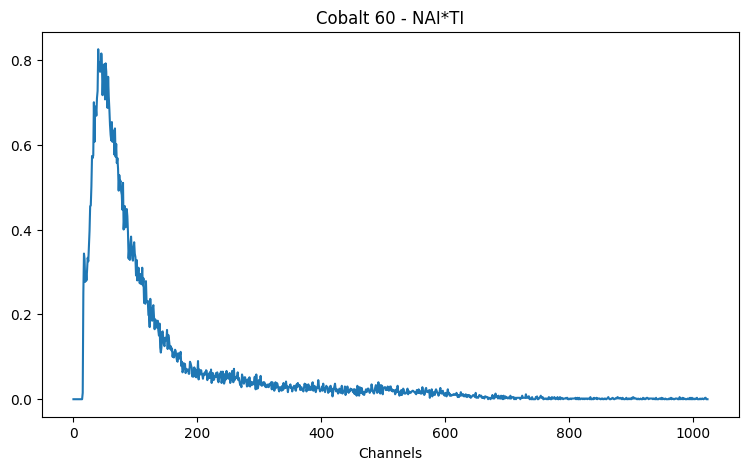

In [11]:
# Make sure I save Cobalt data properly
Co_data, Co_data_head = Spe_parser('NaI_Co_direct.Spe')

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(Co_data)
plt.xlabel('Channels')
plt.title('Cobalt 60 - NAI*TI')

In [12]:
#from google.colab import output
#output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [13]:
#from google.colab import output
#output.disable_custom_widget_manager()

Text(0.5, 1.0, 'Cobalt 60 MINUS Background')

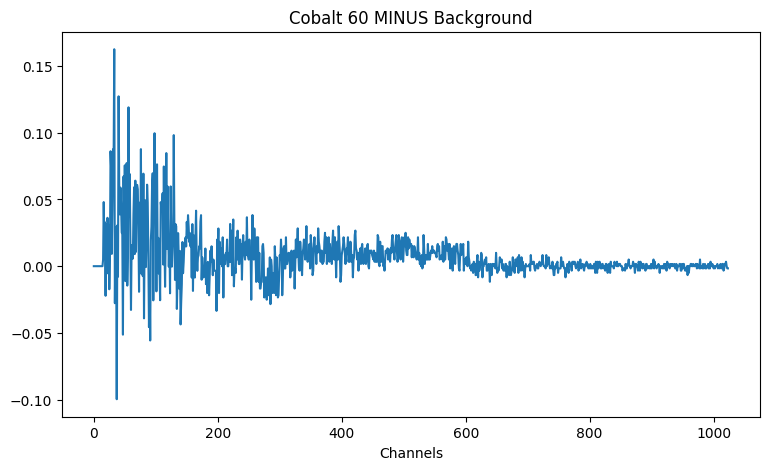

In [14]:
# Now let's try and remove the background

# Import Background data
bck_data, bck_data_head = Spe_parser('NaI_bck_10min.Spe')

# Subtract ????????
Co_data_adj = np.array(Co_data) - np.array(bck_data)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(Co_data_adj)
plt.xlabel('Channels')
plt.title('Cobalt 60 MINUS Background')


Text(0.5, 1.0, 'Background')

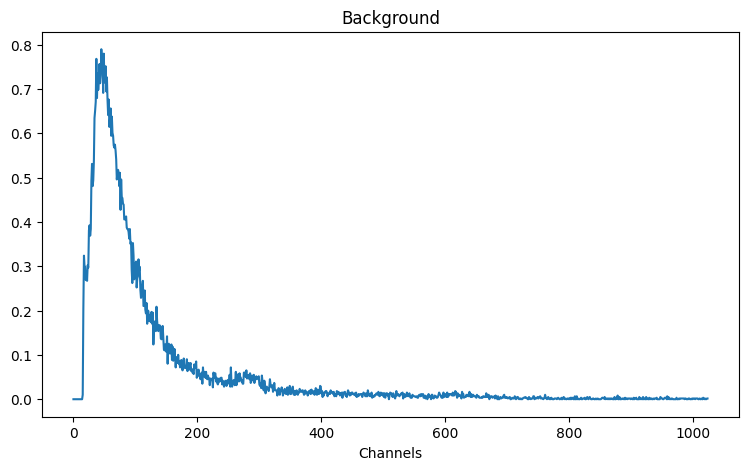

In [15]:
bck_data, bck_data_head = Spe_parser('NaI_bck_10min.Spe')

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(bck_data)
plt.xlabel('Channels')
plt.title('Background')

In [16]:
bck_data_head['MEAS_TIM:']

'599 600'

In [17]:
Co_data_head['MEAS_TIM:']

'600 600'

In [18]:
# Trying with another spectra cause Cobalt is confusing & STUPID

Text(0.5, 1.0, 'Americium')

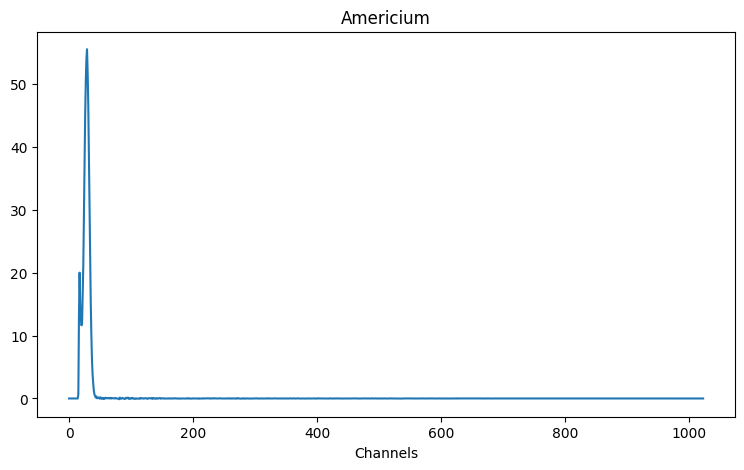

In [19]:
# Americium
Am_data, Am_data_head = Spe_parser('NaI_Am_direct.Spe')

# Remove the background
Am_data_adj = (Am_data - bck_data).flatten() # Flattening to make it easier to math with

# Plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(Am_data_adj)
plt.xlabel('Channels')
plt.title('Americium')

In [20]:
Am_data[1023]

# curvefit can take bounds and would give peak from guess p0
# lnfit

array([0.])

In [21]:
## SKIP THIS WAS ALL STUPID CURVEFIT AND NOW I HAVE GREAT LMFIT

# Fit a stupid gaussian to it

# Seriously just using the stuff from Curvefit_notes.ipynb
def gaussian(x, mu, sigma, amp):
    return amp * np.exp(-0.5 * (x-mu)**2 / sigma**2) #/ np.sqrt(2 * np.pi * sigma**2)

# Get Gaussian values with Moments
def first_moment(x, y):
    return np.sum(x * y) / np.sum(y)

def second_moment(x, y):
    x0 = first_moment(x, y)
    return np.sum((x - x0)**2 * y) / np.sum(y)

def gaussian_initial_estimates(x, y):
    mu0 = first_moment(x, y)
    sig0 = second_moment(x, y)
    amp0 = y.max()
    return [mu0, sig0, amp0]

p0 = [1 , 1, max(Am_data_adj)]

#Well fuck I gotta create an x range since data is just
x_range = np.arange(0,1024)

mu0, sig0, amp0 = gaussian_initial_estimates(x_range, Am_data_adj)


# Now get those fancy popt and pcov guys
from scipy.optimize import curve_fit

import numpy as np

new_data = Am_data_adj.flatten()

p0 = [mu0, sig0, amp0]
popt_trf, pcov_trf = curve_fit(gaussian, x_range, new_data, method = 'trf', p0 = p0)

popt, pcov = curve_fit(gaussian, x_range, new_data, p0 = p0)

popt1, pcov1 = curve_fit(gauss, x_range, new_data, p0 = p0)


NameError: name 'gauss' is not defined

In [ ]:
popt1

In [ ]:
popt_trf

In [ ]:
popt

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
#ax.plot(new_data, label = 'data')
ax.plot(x_range, gaussian(x_range, *p0), label = 'popt normal')
ax.plot(x_range, gaussian(x_range, *popt_trf), label = 'popt trf')
plt.legend()

In [ ]:
pract = [1, 2, 3, 5, 678, 8, 9]
length_1 = len(pract)
#print(pract[0:7])
pract.index(3)

In [22]:
%%capture
!pip install lmfit

In [23]:
# Using lm Model.guess to find best intial parameters
#params = gmodel.guess( Am_data_adj, x_range)
# sorry pal .guess is not available for Gaussian

# Using lm Model.guess with Gaussian Model to find init params
from lmfit.models import GaussianModel
model = GaussianModel()
params = model.guess(Am_data_adj, x_range)
#amp0 = np.arry(params)[0]
#cen0 = np.arry(params)[1]
#wid0 = np.arry(params)[3]


In [ ]:
#gmodel.fit?

##try Americium fit

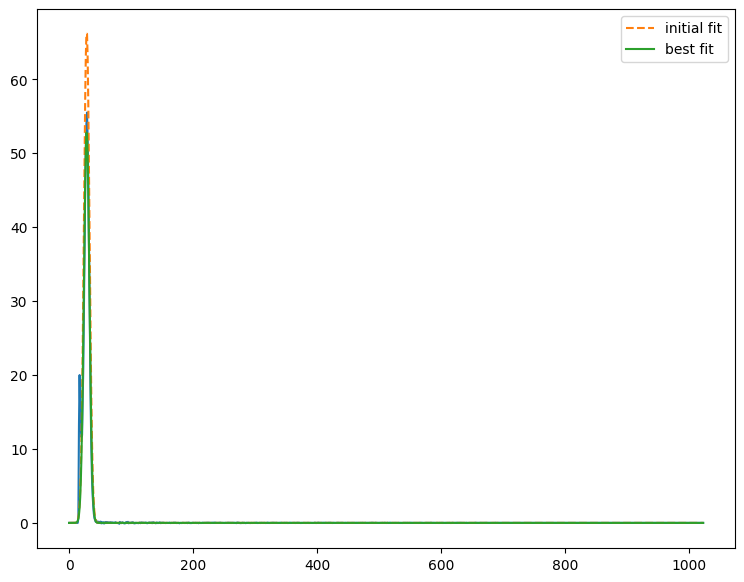

In [24]:
from lmfit import Model

def gauss(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)
gmodel = Model(gauss)

result = model.fit(Am_data_adj,x =x_range, params = params)
#result = gmodel.fit(Am_data_adj, x= x_range, cen = cen0, amp = amp0, wid = wid0)
# cen = 4 , amp = 10 width =21
# cen = 5 , amp = 15, wid = 21


#Create an x range since data is just index & counts
x_range = np.arange(0,1024)

fig, ax = plt.subplots(figsize = (9,7), label = 'my data')
plt.plot(x_range, Am_data_adj)
plt.plot(x_range, result.init_fit, '--', label='initial fit')
plt.plot(x_range, result.best_fit, '-', label='best fit')
plt.legend()
plt.show()


In [25]:
params.values()


dict_values([<Parameter 'amplitude', value=750.9004196182827, bounds=[-inf:inf]>, <Parameter 'center', value=28.5, bounds=[-inf:inf]>, <Parameter 'sigma', value=4.5, bounds=[0.0:inf]>, <Parameter 'fwhm', value=10.59669, bounds=[-inf:inf], expr='2.3548200*sigma'>, <Parameter 'height', value=66.5702089941073, bounds=[-inf:inf], expr='0.3989423*amplitude/max(1e-15, sigma)'>])

In [26]:
p = np.array(params)
p

array([750.90041962,  28.5       ,   4.5       ,  10.59669   ,
        66.57020899])

In [27]:
params

name,value,initial value,min,max,vary,expression
amplitude,750.900420,750.9004196182827,-inf,inf,True,
center,28.5000000,28.5,-inf,inf,True,
sigma,4.50000000,4.5,0.00000000,inf,True,
fwhm,10.5966900,None,-inf,inf,False,2.3548200*sigma
height,66.5702090,None,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"


In [ ]:
# CURVE FIT YOU ARE DEAD TO ME! YOU HEAR ME? YOU CAN DIE

In [ ]:
# Now I have a fitted Gaussian I want to find the peak x-coordinate
result

In [28]:
result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,591.818038,4.16775909,(0.70%),750.9004196182827,-inf,inf,True,
center,28.3986768,0.03622469,(0.13%),28.5,-inf,inf,True,
sigma,4.45475729,0.03622512,(0.81%),4.5,0.00000000,inf,True,
fwhm,10.4901516,0.08530363,(0.81%),10.59669,-inf,inf,False,2.3548200*sigma
height,52.9998009,0.37324007,(0.70%),66.5702089941073,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"


In [29]:
result.params['center'].value

28.398676849422937

In [31]:
result.params['center'].stderr

0.03622468711340982

In [30]:
# Now we have found the channel number for the peak and we want to save it to a table
peak_chan = []
peak_eng = []
peak_chan.append(result.params['center'].value)
peak_eng.append(59.5) #keV

In [32]:
# Now I gotta figure out how to find a peak on multiple peaks

# Can find a peak
# Can find the data range around the peak
# Can Model.set_param_hint(name, **kwargs)

In [33]:
import os
import sys
from scipy.signal import find_peaks

##try Barium Peak

Text(0.5, 1.0, 'Barium - NAITI')

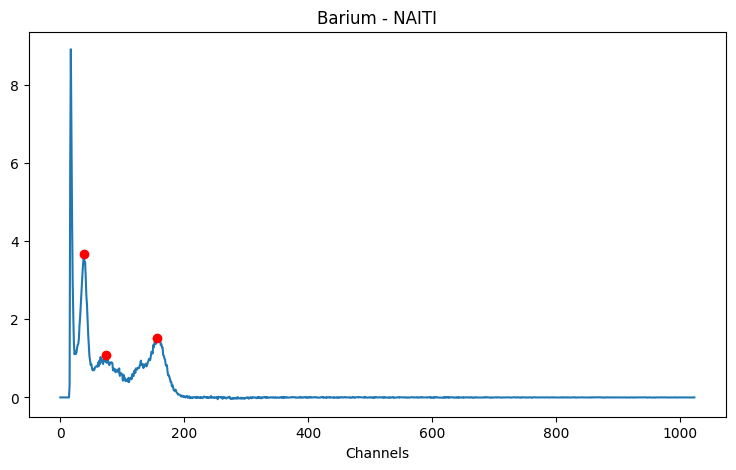

In [34]:
# Trying with multiple peaks

# Barium
Ba_data, Ba_data_head = Spe_parser('NaI_Ba_direct.Spe')

# Remove the background
Ba_data_adj = (Ba_data - bck_data).flatten() # Flattening to make it easier to math with

# See how find_peaks works
peaks, _ = find_peaks(Ba_data_adj, height = 0.5, width = 5)

# Plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(Ba_data_adj)
ax.plot(x_range[peaks], Ba_data_adj[peaks], 'ro')
plt.xlabel('Channels')
plt.title('Barium - NAITI')


In [35]:
peaks

array([ 38,  74, 156])

In [36]:
x_range[peaks]

array([ 38,  74, 156])

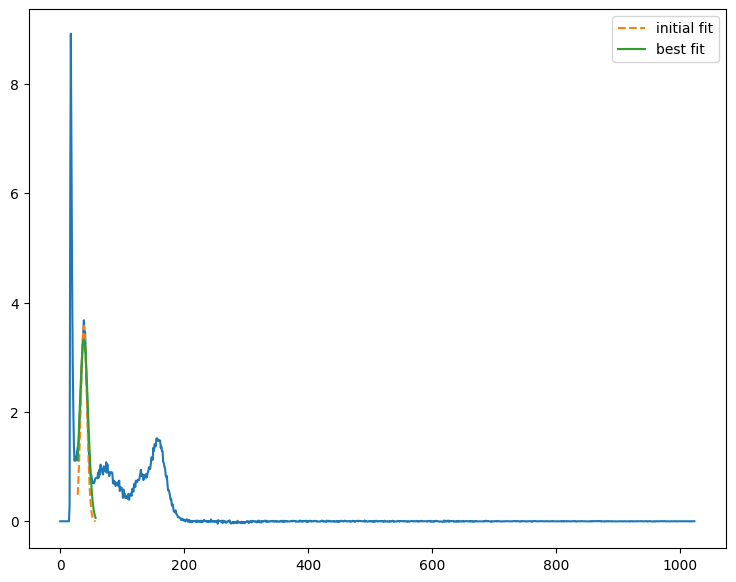

In [37]:
# Now we know we have these peaks, how do I focus the gaussian fit only on that peak?
# initial centroid

from lmfit.models import GaussianModel
model = GaussianModel()
params = model.guess(Ba_data_adj[peaks[0]-10:peaks[0]+20], x_range[peaks[0]-10:peaks[0]+20])



#amp0 = np.arry(params)[0]
#cen0 = np.arry(params)[1]
#wid0 = np.arry(params)[3]

result_Ba = model.fit(Ba_data_adj[peaks[0]-10:peaks[0]+20], x = x_range[peaks[0]-10:peaks[0]+20], params = params)

fig, ax = plt.subplots(figsize = (9,7))
plt.plot(x_range, Ba_data_adj)
plt.plot(x_range[peaks[0]-10:peaks[0]+20], result_Ba.init_fit, '--', label='initial fit')
plt.plot(x_range[peaks[0]-10:peaks[0]+20], result_Ba.best_fit, '-', label='best fit')
plt.legend()
plt.show()

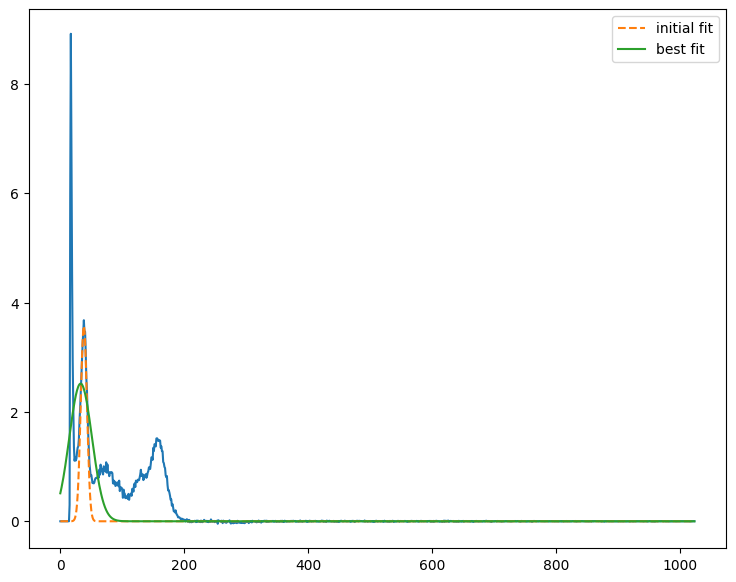

In [38]:
# I've constrained the initial parameters but using all the data for the fit,
# shifts the fit towards the stupid high peak
Ba_1result = model.fit(Ba_data_adj, x = x_range, params = params)
fig, ax = plt.subplots(figsize = (9,7), label = 'my data')
plt.plot(x_range, Ba_data_adj)
plt.plot(x_range, Ba_1result.init_fit, '--', label='initial fit')
plt.plot(x_range, Ba_1result.best_fit, '-', label='best fit')
plt.legend()
plt.show()

In [39]:
Ba_1result

In [40]:
result_Ba

##Gaussian function

In [41]:
# Make it a function

def peak_gauss(xdata, ydata, lr, hr, plot_title):

  # Find peaks of data
  peaks, _ = find_peaks(ydata, height = 1, width = 5)

  # Loop through peaks and fit gaussian
  from lmfit.models import GaussianModel
  model = GaussianModel()

  fig, ax = plt.subplots(figsize = (9,7))
  plt.plot(xdata, ydata)
  plt.title(plot_title)

  # Save results
  peakgauss_result = []
  centroid_result = []

  # Peak counter cause I hate np.where
  peaknum = 1

  for val in peaks:

    chan_range = np.arange((val - lr), (val + hr))
        #(val - 10), (val + 20))


    params = model.guess(ydata[chan_range], xdata[chan_range])

    result = model.fit(ydata[chan_range], x = xdata[chan_range], params = params)

    # Add result to results array
    peakgauss_result.append(result)
    centroid_result.append(result.params['center'].value)

    # Plot
    plt.plot(xdata[chan_range], result.init_fit, '--', label=f'initial fit peak {peaknum}')
    plt.plot(xdata[chan_range], result.best_fit, '-', label=f'best fit peak {peaknum}')
    plt.xlabel('Channel')
    plt.ylabel('Counts per Second')
    plt.legend()

    # Add nice labels
    plt.text(val,4, f'P {peaknum}', color = 'red')

    peaknum += 1

  return peakgauss_result, centroid_result

##Barium peak and energy

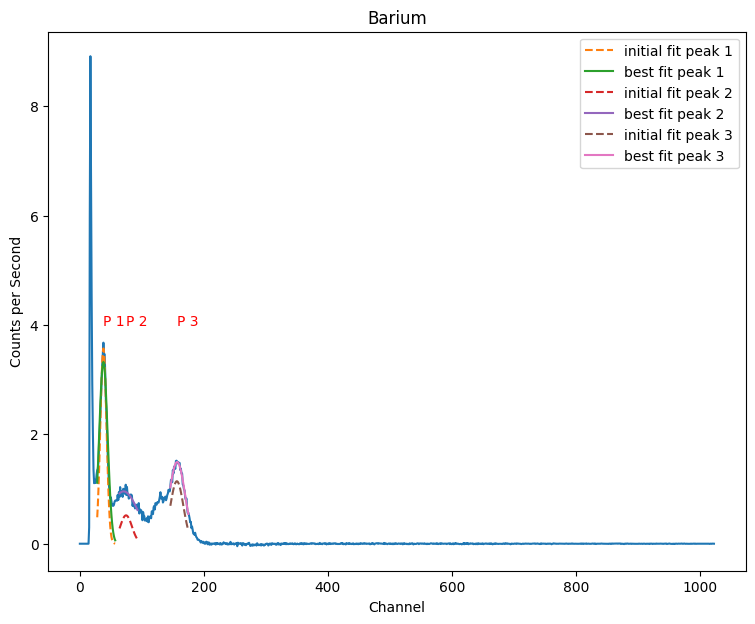

In [42]:
#peaks, _ = find_peaks(Ba_data_adj, height = 1, width = 5)
result_array, Bacentroid_result = peak_gauss(x_range, Ba_data_adj, 10, 20, 'Barium')

In [43]:
# Now I have to manually assign energies to those peaks
Ba_energies = [30.81, 81.07] # keV for those peaks at 31 and 152
Ba_channels = Bacentroid_result

##Cesium peak and energy

In [44]:
# Trying it for Cesium
# Cesium
Cs_data, Cs_data_head = Spe_parser('NaI_Cs_direct.Spe')

# Remove the background
Cs_data_adj = (Cs_data - bck_data).flatten() # Flattening to make it easier to math with

# Didn't need anymore, figured out issue
# Choose peaks
#Cs_peaks, _ = find_peaks(Cs_data_adj, height = 1, width = 10)

# Plot
#fig, ax = plt.subplots(figsize=(9,5))
#ax.plot(Cs_data_adj)
#ax.plot(x_range[Cs_peaks], Cs_data_adj[Cs_peaks], 'ro')
#plt.xlabel('Channels')
#plt.title('Cesium')



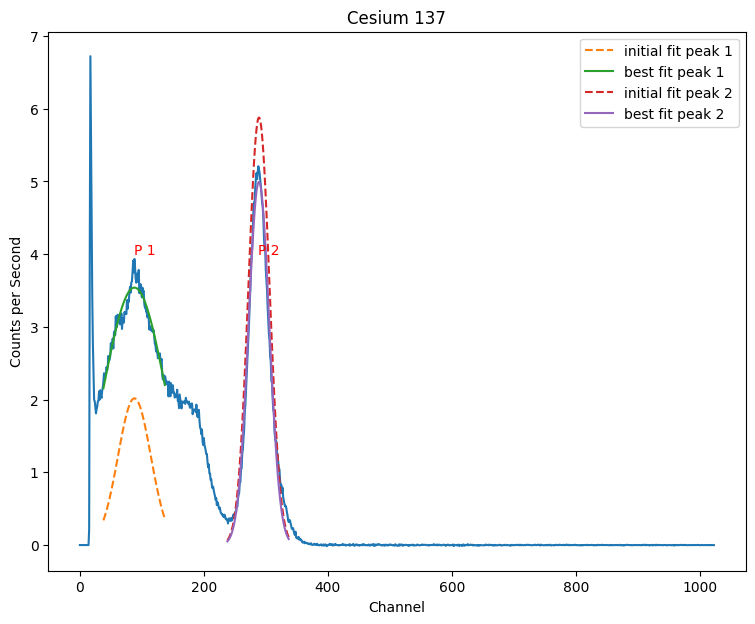

In [45]:

# Find my peaks and gaussian fits
Cs_results, Cs_centroids = peak_gauss(x_range, Cs_data_adj, 50, 50, 'Cesium 137')

In [46]:
# Lookijng at the graph
# We don't want peak 1
# Peak 2 is 31.39 keV
# Peak 3 is 661.31 keV
Cs_energies = [31.39 , 661.31]
Cs_channels = Cs_centroids[1:]

In [47]:
Cs_centroids

[88.03111545337602, 288.9016471205003]

In [48]:
Cs_channels

[288.9016471205003]

In [49]:
result_array

In [50]:
Bacentroid_result

[37.97265855725699, 70.62243735135509, 156.96210925851608]

In [51]:
result_array[0].params['center'].value

37.97265855725699

In [52]:
v3 = 'v3'
label = f'your {v3}'
print(label)

your v3


In [53]:
yolo = np.array([1 , 2 , 4])
#yolo.index(2)
numwhere = np.where(yolo== 2)
int(numwhere[0])

/tmp/ipython-input-208952991.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(numwhere[0])


1

##Americium peak and energy

In [54]:
# Trying with Amercium
AM_data, AM_data_head = Spe_parser('NaI_Am_direct.Spe')

# Remove the background
AM_data_adj = (AM_data - bck_data).flatten() # Flattening to make it easier to math with

# Didn't need anymore, figured out issue
# Choose peaks
#Cs_peaks, _ = find_peaks(Cs_data_adj, height = 1, width = 10)

# Plot
#fig, ax = plt.subplots(figsize=(9,5))
#ax.plot(Cs_data_adj)
#ax.plot(x_range[Cs_peaks], Cs_data_adj[Cs_peaks], 'ro')
#plt.xlabel('Channels')
#plt.title('Cesium')


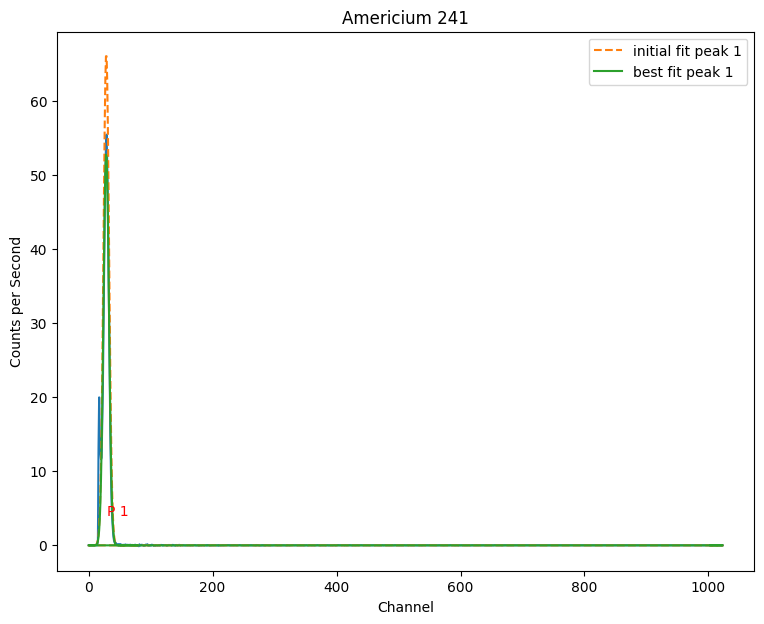

In [55]:
# Find my peaks and gaussian fits
AM_results, AM_centroids = peak_gauss(x_range, AM_data_adj, 50, 50, 'Americium 241')
# Now I have to manually assign energies to those peaks
AM_energies = [2.12] # keV
AM_channels = AM_centroids

In [56]:
AM_centroids

[28.398676827302463]

##Cobalt Peaks

In [57]:
# Trying with Cobalt
Co_data, Co_data_head = Spe_parser('NaI_Co_direct.Spe')

# Remove the background
Co_data_adj = (Co_data - bck_data).flatten() # Flattening to make it easier to math with

# Didn't need anymore, figured out issue
# Choose peaks
#Cs_peaks, _ = find_peaks(Cs_data_adj, height = 1, width = 10)

# Plot
#fig, ax = plt.subplots(figsize=(9,5))
#ax.plot(Cs_data_adj)
#ax.plot(x_range[Cs_peaks], Cs_data_adj[Cs_peaks], 'ro')
#plt.xlabel('Channels')
#plt.title('Cesium')


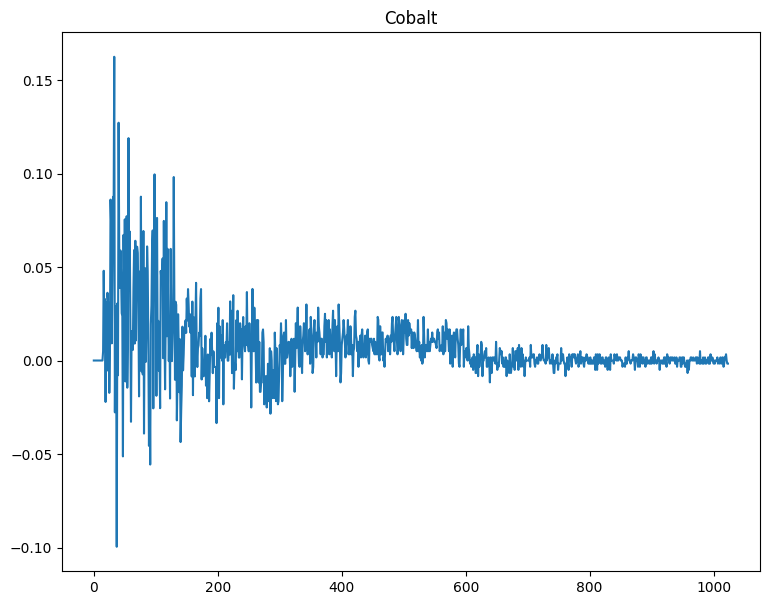

In [58]:
# Find my peaks and gaussian fits
Co_results, Co_centroids = peak_gauss(x_range, Co_data_adj, 50, 50, 'Cobalt')

# Now I have to manually assign energies to those peaks

In [59]:
Co_energies = [0.0] # keV
Co_channels = Co_centroids

Peaks found at channels: [ 40 152 247 256 596]
Peak heights: [0.12717028 0.03819978 0.03661658 0.03828603 0.0166611 ]


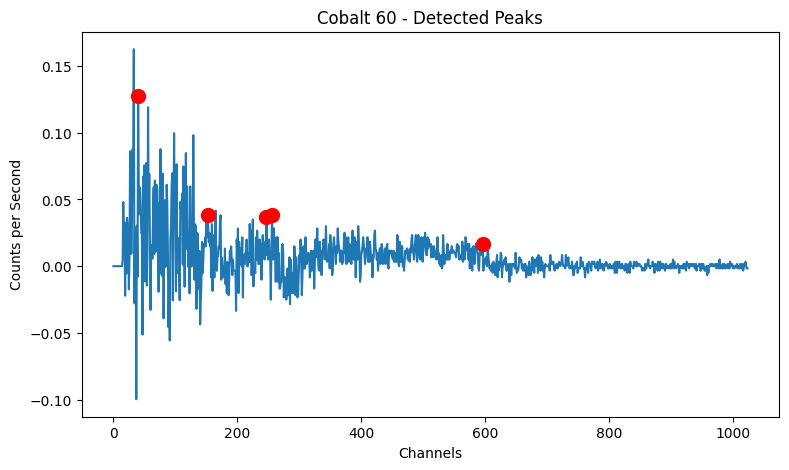

In [60]:
# First, let's see what peaks are being detected
peaks, _ = find_peaks(Co_data_adj, height = 0.01, width = 5)
print(f"Peaks found at channels: {peaks}")
print(f"Peak heights: {Co_data_adj[peaks]}")

# Plot to visualize where peaks are detected
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(Co_data_adj)
ax.plot(peaks, Co_data_adj[peaks], 'ro', markersize=10)
plt.xlabel('Channels')
plt.ylabel('Counts per Second')
plt.title('Cobalt 60 - Detected Peaks')
plt.show()

GAUSSIAN FIT RESULTS - Peak at Channel 596
Fitted Center: 563.18 ± 5.7726
Amplitude: 0.771107 ± 0.144381
Sigma: 26.87 ± 5.4510
FWHM: 63.27
Height: 0.011450

Reduced Chi-square: 0.0000
R-squared: 0.3986


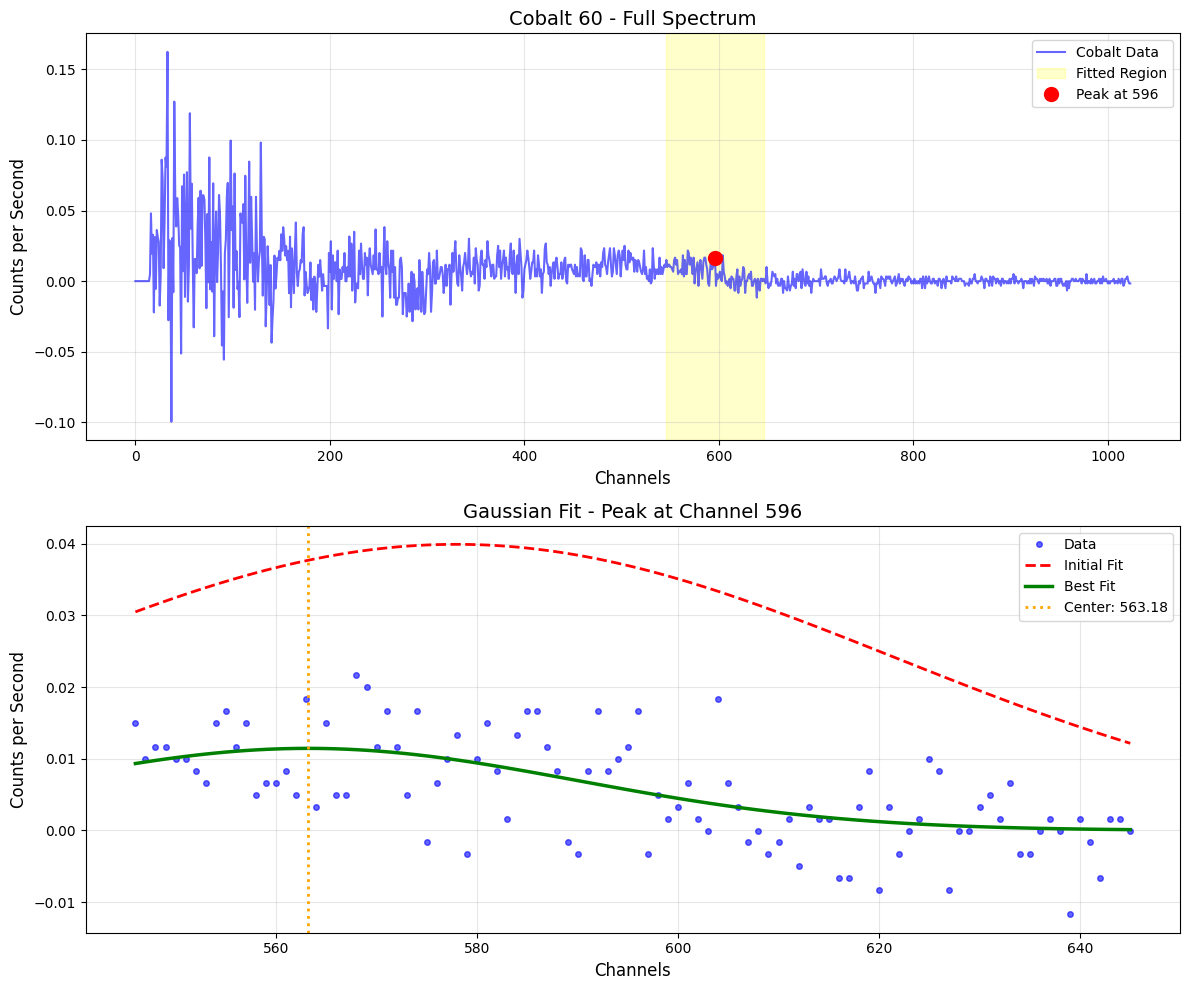


You can now assign an energy to this peak:
If this is one of the Cobalt-60 photopeaks, it should be either:
  - 1173.2 keV
  - 1332.5 keV


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel

# Assuming you have Co_data_adj already loaded and background subtracted
# Co_data_adj = (Co_data - bck_data).flatten()

# Create x-axis (channel numbers)
x_range = np.arange(0, len(Co_data_adj))

# Fit Gaussian only to the peak at channel 596
peak_channel = 596

# Define fitting range around the peak (adjust as needed)
left_range = 50   # channels to the left
right_range = 50  # channels to the right

start_chan = peak_channel - left_range
end_chan = peak_channel + right_range

chan_range = np.arange(start_chan, end_chan)

# Fit the Gaussian
model = GaussianModel()
params = model.guess(Co_data_adj[chan_range], x=x_range[chan_range])
result = model.fit(Co_data_adj[chan_range], x=x_range[chan_range], params=params)

# Print fit results
print("="*50)
print("GAUSSIAN FIT RESULTS - Peak at Channel 596")
print("="*50)
print(f"Fitted Center: {result.params['center'].value:.2f} ± {result.params['center'].stderr:.4f}")
print(f"Amplitude: {result.params['amplitude'].value:.6f} ± {result.params['amplitude'].stderr:.6f}")
print(f"Sigma: {result.params['sigma'].value:.2f} ± {result.params['sigma'].stderr:.4f}")
print(f"FWHM: {result.params['fwhm'].value:.2f}")
print(f"Height: {result.params['height'].value:.6f}")
print(f"\nReduced Chi-square: {result.redchi:.4f}")
print(f"R-squared: {1 - result.residual.var() / np.var(Co_data_adj[chan_range]):.4f}")

# Plot the full spectrum with the fit
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Top plot: Full spectrum with fitted region highlighted
ax1.plot(x_range, Co_data_adj, 'b-', alpha=0.6, label='Cobalt Data')
ax1.axvspan(start_chan, end_chan, alpha=0.2, color='yellow', label='Fitted Region')
ax1.plot(peak_channel, Co_data_adj[peak_channel], 'ro', markersize=10, label='Peak at 596')
ax1.set_xlabel('Channels', fontsize=12)
ax1.set_ylabel('Counts per Second', fontsize=12)
ax1.set_title('Cobalt 60 - Full Spectrum', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom plot: Zoomed in on the fitted peak
ax2.plot(x_range[chan_range], Co_data_adj[chan_range], 'bo',
         markersize=4, alpha=0.6, label='Data')
ax2.plot(x_range[chan_range], result.init_fit, 'r--',
         linewidth=2, label='Initial Fit')
ax2.plot(x_range[chan_range], result.best_fit, 'g-',
         linewidth=2.5, label='Best Fit')
ax2.axvline(result.params['center'].value, color='orange',
            linestyle=':', linewidth=2, label=f'Center: {result.params["center"].value:.2f}')
ax2.set_xlabel('Channels', fontsize=12)
ax2.set_ylabel('Counts per Second', fontsize=12)
ax2.set_title(f'Gaussian Fit - Peak at Channel {peak_channel}', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Store the result for later use
Co_centroids = [result.params['center'].value]
Co_results = [result]

print("\nYou can now assign an energy to this peak:")
print("If this is one of the Cobalt-60 photopeaks, it should be either:")
print("  - 1173.2 keV")
print("  - 1332.5 keV")

4 files
each named after the isotope
each txt files with
- regions of interest for each detector(where peaks should be channels)
- corresponding energy for that region of interest
yamL files create dictionary
roi:
  CdTe:
      [30,60]


can also hard code he doesn't care


In [ ]:
## STuipid Error Propagation
# Well lmfit will give us the gaussian fit error (boo)
# and then linearfit should give us an error for the linear fit as well (yuck)
# and then we just need to google how to propagate that shit (diGUSting)


## THat freaking Efficiency shit
# Just gotta look it up in the student handbook I will do that sometime before Tuesday

In [ ]:
Cs_results[0]